# Emotions GAM

Notebook para obtener las emociones que han despertado a los usuarios los cuadros de GAM. En este caso procedemos a:

1. Obtener la lista de emojis usados por los usuarios.
2. Cambiar los emojins por emociones de la escala de Plunchkin.
3. Crear el dataset final de emociones.

In [147]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd
import numpy as np

import emojis

In [3]:
from context import community_module
from community_module.community_detection.similarityCommunityDetection import SimilarityCommunityDetection
from community_module.community_detection.explainedCommunitiesDetection import ExplainedCommunitiesDetection
from community_module.visualization.gephiVisualization import GephiVisualization

from sklearn.metrics.pairwise import cosine_similarity
from community_module.similarity.artworkEmotionSimilarity import ArtworkEmotionSimilarity

In [4]:
interactions_df = pd.read_csv('../../data/GAM/clean_data/interactions.csv')

# Me quedo solo con las columnas user, artwork y q4 (emojis)
emojis_df = interactions_df[['user', 'artwork', 'q4']]
emojis_df.head()

,user,artwork,q4
0,2,1,NaN
1,2,2,NaN
2,2,3,NaN
3,2,4,NaN
4,2,5,NaN


In [5]:
# Eliminamos filas NaN
emojis_df = emojis_df[~emojis_df.isna()['q4']]
emojis_df

,user,artwork,q4
36,5,1,😍 feelings of love or infatuation
37,5,2,relaxed
38,5,3,😕 confused
39,5,4,😕 confused
40,5,5,🙂 slightly happy
...,...,...,...
1479,125,4,🙂 leggermente felice
1488,126,1,"😕 confusione, 🤔 pensieroso"
1489,126,2,tranquillità
1490,126,3,"😕 confusione, 😱 paura"


In [6]:
# Agrupamos por emojins
emojis_df.groupby(by='q4').count().sort_values(by='user', ascending=False)

,user,artwork
q4,,
🤔 thoughtful,27,27
🙂 slightly happy,24,24
🙂 leggermente felice,23,23
😄 felice,22,22
🤔 pensieroso,22,22
...,...,...
investigative,1,1
inquietata,1,1
fire,1,1


In [7]:
emojis_df.tail(5)

,user,artwork,q4
1479,125,4,🙂 leggermente felice
1488,126,1,"😕 confusione, 🤔 pensieroso"
1489,126,2,tranquillità
1490,126,3,"😕 confusione, 😱 paura"
1491,126,4,😍 sentimenti di amore o infatuazione


In [8]:
# extract emoji(s) from text
def get_emoji(text):
    #return emojis.get(text)
    # remove \u200d character in excel files
    #text = str(text.encode('ascii', 'ignore'))
    text = text.replace('\u200d','')
    #return emoji.distinct_emoji_list(text)
    return emojis.get(text)

In [9]:
emojis_df['emoji'] = emojis_df['q4'].apply(get_emoji)
emojis_df.head()

,user,artwork,q4,emoji
36,5,1,😍 feelings of love or infatuation,{😍}
37,5,2,relaxed,{}
38,5,3,😕 confused,{😕}
39,5,4,😕 confused,{😕}
40,5,5,🙂 slightly happy,{🙂}


In [10]:
def has_emoji(emoji_column):
    return len(emoji_column) > 0

In [11]:
all_emojis = set().union(*list(emojis_df[emojis_df['emoji'].apply(has_emoji)]['emoji'].values))
all_emojis = list(all_emojis)
all_emojis

['🤷',
 '🛌',
 '🤯',
 '😢',
 '😏',
 '♀️',
 '😎',
 '🤢',
 '😥',
 '😄',
 '❤️',
 '😍',
 '💋',
 '🧐',
 '🥺',
 '😔',
 '👹',
 '😂',
 '☺️',
 '🙁',
 '😬',
 '🤫',
 '😴',
 '🙂',
 '✨',
 '😡',
 '🥰',
 '👩',
 '🤔',
 '😌',
 '🌡️',
 '🧠',
 '🙄',
 '🤐',
 '😮',
 '😱',
 '😕',
 '😊']

In [12]:
['☺️',
 '🌡️',
 '🤔',
 '🤐',
 '👹',
 '😔',
 '🤷',
 '🧐',
 '😢',
 '🙂',
 '😄',
 '✨',
 '😬',
 '🥺',
 '🤫',
 '🧠',
 '😎',
 '😊',
 '🥰',
 '❤️',
 '😱',
 '😮',
 '🙁',
 '🤯',
 '👩',
 '😴',
 '🙄',
 '🛌',
 '😡',
 '😥',
 '😕',
 '😏',
 '🤢',
 '😍',
 '😂',
 '♀️',
 '😌',
 '💋']

['☺️',
 '🌡️',
 '🤔',
 '🤐',
 '👹',
 '😔',
 '🤷',
 '🧐',
 '😢',
 '🙂',
 '😄',
 '✨',
 '😬',
 '🥺',
 '🤫',
 '🧠',
 '😎',
 '😊',
 '🥰',
 '❤️',
 '😱',
 '😮',
 '🙁',
 '🤯',
 '👩',
 '😴',
 '🙄',
 '🛌',
 '😡',
 '😥',
 '😕',
 '😏',
 '🤢',
 '😍',
 '😂',
 '♀️',
 '😌',
 '💋']

In [13]:
all_emojis[0]

'🤷'

In [14]:
# Voy a convertirlos a emociones con el dataset que se proporciona aquí https://github.com/abushoeb/EmoTag
#emotags_df = pd.read_csv('../../data/GAM/clean_data/EmoTag1200-scores.csv')
emotags_df = pd.read_csv('../../data/GAM/clean_data/EmoTag1200-scores-Copy1.csv')
emotags_df

,unicode,emoji,name,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,1F308,🌈,rainbow,0.69,0.28,0.00,0.69,0.69,0.06,0.22,0.33
1,1F308,🌈,rainbow,0.00,0.28,0.00,0.00,0.69,0.06,0.22,0.33
2,1F319,🌙,crescent moon,0.00,0.31,0.00,0.00,0.25,0.00,0.06,0.25
3,1F31A,🌚,new moon face,0.06,0.08,0.17,0.06,0.42,0.19,0.06,0.11
4,1F31E,🌞,sun with face,0.00,0.22,0.00,0.00,0.78,0.00,0.11,0.22
...,...,...,...,...,...,...,...,...,...,...,...
146,2757,❗,exclamation mark,0.44,0.42,0.31,0.42,0.08,0.17,0.81,0.11
147,2764,❤,red heart,0.00,0.36,0.00,0.00,0.69,0.00,0.14,0.67
148,27A1,➡,right arrow,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.22
149,2B05,⬅,left arrow,0.17,0.14,0.17,0.14,0.00,0.14,0.03,0.06


In [15]:
emotags_df[emotags_df['emoji'] == all_emojis[2]]

,unicode,emoji,name,anger,anticipation,disgust,fear,joy,sadness,surprise,trust


In [16]:
emojis_found = emotags_df[emotags_df['emoji'].isin(all_emojis)]['emoji'].values

In [17]:
print('Emojis que no se encuentran en el sentiment analysis')
set(all_emojis).difference(set(emojis_found))

Emojis que no se encuentran en el sentiment analysis


{'☺️',
 '♀️',
 '❤️',
 '🌡️',
 '👩',
 '👹',
 '😮',
 '🙁',
 '🙂',
 '🙄',
 '🛌',
 '🤐',
 '🤔',
 '🤢',
 '🤫',
 '🤯',
 '🤷',
 '🥰',
 '🥺',
 '🧐',
 '🧠'}

In [18]:
print('Emojis que si se encuentran en el sentiment analysis')
set(emojis_found)

Emojis que si se encuentran en el sentiment analysis


{'✨',
 '💋',
 '😂',
 '😄',
 '😊',
 '😌',
 '😍',
 '😎',
 '😏',
 '😔',
 '😕',
 '😡',
 '😢',
 '😥',
 '😬',
 '😱',
 '😴'}

In [19]:
emotags_df[emotags_df['emoji'].isin(emojis_found)]

,unicode,emoji,name,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
38,1F48B,💋,kiss mark,0.00,0.28,0.00,0.00,0.78,0.00,0.19,0.69
68,1F602,😂,face with tears of joy,0.00,0.17,0.06,0.06,0.94,0.00,0.33,0.22
70,1F604,😄,grinning face with smiling eyes,0.00,0.36,0.00,0.00,0.86,0.00,0.28,0.28
76,1F60A,😊,smiling face with smiling eyes,0.00,0.42,0.00,0.00,0.92,0.00,0.33,0.47
78,1F60C,😌,relieved face,0.00,0.33,0.00,0.11,0.81,0.00,0.22,0.61
79,1F60D,😍,smiling face with heart-eyes,0.00,0.31,0.00,0.00,0.83,0.00,0.50,0.50
80,1F60E,😎,smiling face with sunglasses,0.00,0.22,0.00,0.00,0.75,0.00,0.06,0.33
81,1F60F,😏,smirking face,0.22,0.33,0.28,0.14,0.22,0.22,0.11,0.22
86,1F614,😔,pensive face,0.25,0.22,0.31,0.28,0.00,0.72,0.19,0.14
87,1F615,😕,confused face,0.19,0.42,0.36,0.36,0.00,0.39,0.28,0.17


In [20]:
not_found_emojis = list(set(all_emojis).difference(set(emojis_found)))
for em in not_found_emojis:
    data = emojis.db.get_emoji_by_code(em)
    #data = emoji.emojize(em)
    print(em, 'tags:', data.tags, 'aliases:', data.aliases)
#    print(emojis.db.get_emoji_by_code(em))


🤷 tags: [] aliases: ['shrug']
🛌 tags: [] aliases: ['sleeping_bed']
🤯 tags: ['mind', 'blown'] aliases: ['exploding_head']
♀️ tags: [] aliases: ['female_sign']
🤢 tags: ['sick', 'barf', 'disgusted'] aliases: ['nauseated_face']
❤️ tags: ['love'] aliases: ['heart']
🧐 tags: [] aliases: ['monocle_face']
🥺 tags: ['puppy', 'eyes'] aliases: ['pleading_face']
👹 tags: ['monster'] aliases: ['japanese_ogre']
☺️ tags: ['blush', 'pleased'] aliases: ['relaxed']
🙁 tags: [] aliases: ['slightly_frowning_face']
🤫 tags: ['silence', 'quiet'] aliases: ['shushing_face']
🙂 tags: [] aliases: ['slightly_smiling_face']
🥰 tags: ['love'] aliases: ['smiling_face_with_three_hearts']
👩 tags: ['girls'] aliases: ['woman']
🤔 tags: [] aliases: ['thinking']
🌡️ tags: [] aliases: ['thermometer']
🧠 tags: [] aliases: ['brain']
🙄 tags: [] aliases: ['roll_eyes']
🤐 tags: ['silence', 'hush'] aliases: ['zipper_mouth_face']
😮 tags: ['surprise', 'impressed', 'wow'] aliases: ['open_mouth']


In [21]:
data = emojis.db.get_emoji_by_code('☺️').aliases

In [22]:
data

['relaxed']

In [23]:
{
    '🥰': 'Love',
    '🧐': ''
}

{'🥰': 'Love', '🧐': ''}

In [24]:
# My changes from here

In [25]:
emojis_df

,user,artwork,q4,emoji
36,5,1,😍 feelings of love or infatuation,{😍}
37,5,2,relaxed,{}
38,5,3,😕 confused,{😕}
39,5,4,😕 confused,{😕}
40,5,5,🙂 slightly happy,{🙂}
...,...,...,...,...
1479,125,4,🙂 leggermente felice,{🙂}
1488,126,1,"😕 confusione, 🤔 pensieroso","{🤔, 😕}"
1489,126,2,tranquillità,{}
1490,126,3,"😕 confusione, 😱 paura","{😱, 😕}"


In [26]:
emojis_df.head(1)

,user,artwork,q4,emoji
36,5,1,😍 feelings of love or infatuation,{😍}


In [27]:
# Separate lists of emojis in different columns
emojis_df2 = emojis_df.set_index(['user', 'artwork', 'q4']).apply(lambda x: x.explode()).reset_index()
emojis_df2



,user,artwork,q4,emoji
0,5,1,😍 feelings of love or infatuation,😍
1,5,2,relaxed,NaN
2,5,3,😕 confused,😕
3,5,4,😕 confused,😕
4,5,5,🙂 slightly happy,🙂
...,...,...,...,...
997,126,1,"😕 confusione, 🤔 pensieroso",😕
998,126,2,tranquillità,NaN
999,126,3,"😕 confusione, 😱 paura",😱
1000,126,3,"😕 confusione, 😱 paura",😕


In [28]:
emojis_df2[(emojis_df2['user'] == 126)]

,user,artwork,q4,emoji
996,126,1,"😕 confusione, 🤔 pensieroso",🤔
997,126,1,"😕 confusione, 🤔 pensieroso",😕
998,126,2,tranquillità,NaN
999,126,3,"😕 confusione, 😱 paura",😱
1000,126,3,"😕 confusione, 😱 paura",😕
1001,126,4,😍 sentimenti di amore o infatuazione,😍


In [29]:
# Get the emotion corresponding to each emoji




In [30]:
# Try to get user x artwork (values: list of emojis)
user_artwork_emojis = pd.pivot_table(emojis_df, values='emoji', index='user', columns='artwork', fill_value=0, aggfunc=np.sum)
user_artwork_emojis

artwork,1,2,3,4,5,6,7,8,9,10,11,12
user,,,,,,,,,,,,
5,{😍},{},{😕},{😕},{🙂},{😔},{},{🙂},0,0,0,0
6,{😱},{🤔},{😕},{😍},{🙂},{😔},{🤔},{},{😍},{😴},{😴},"{😱, 🤢}"
7,"{😮, 🤔}","{🙂, 🤔}","{🤢, 😔}",{🙂},{🙂},"{🙂, 🤔}","{🤔, 😌}","{🙂, 😴}",0,0,0,0
8,{🙂},{😄},{😱},{😍},{😄},{😴},{😴},{😕},0,0,0,0
9,"{😱, 😮, 🤔}","{🙂, 🤔}","{🤔, 😕}","{😱, 🤔}","{🤔, 😕}","{😔, 🤔}",{😍},{😱},{🙂},{😡},{🙂},"{😱, 😕}"
...,...,...,...,...,...,...,...,...,...,...,...,...
122,{😍},{🙂},"{🤔, 😔, 😕}","{😍, 🤔}",{🤔},"{🙂, 😮, 🤔}","{🙂, 🤔}","{😍, 🙂}","{😍, 🙂}",{🤔},"{🙂, 🤔}","{😔, 😮, 🤔}"
123,{🙂},{😄},{😔},{😮},{🙂},{😔},{😢},{😄},{😍},"{🤔, 😡}",{😄},"{😱, 😮, 🤔}"
124,{🤔},0,{🤫},{😱},{🙂},{🤔},{},{😱},0,0,{😄},0


In [31]:
# Try to get user x artwork (values: list of emotions based on the emojis)
user_artwork_emotions = pd.pivot_table(emojis_df2, values='emoji', index='user', columns='artwork', fill_value=0, aggfunc=np.sum)
user_artwork_emotions



artwork,1,2,3,4,5,6,7,8,9,10,11,12
user,,,,,,,,,,,,
5,😍,0,😕,😕,🙂,😔,0,🙂,0,0,0,0
6,😱,🤔,😕,😍,🙂,😔,🤔,0,😍,😴,😴,😱🤢
7,😮🤔,🙂🤔,🤢😔,🙂,🙂,🙂🤔,🤔😌,🙂😴,0,0,0,0
8,🙂,😄,😱,😍,😄,😴,😴,😕,0,0,0,0
9,😱😮🤔,🙂🤔,🤔😕,😱🤔,🤔😕,😔🤔,😍,😱,🙂,😡,🙂,😱😕
...,...,...,...,...,...,...,...,...,...,...,...,...
122,😍,🙂,🤔😔😕,😍🤔,🤔,🙂😮🤔,🙂🤔,😍🙂,😍🙂,🤔,🙂🤔,😔😮🤔
123,🙂,😄,😔,😮,🙂,😔,😢,😄,😍,🤔😡,😄,😱😮🤔
124,🤔,0,🤫,😱,🙂,🤔,0,😱,0,0,😄,0


In [32]:
# For the user-artwork pairs with more than one emoji, separate them in different rows
# https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe




In [33]:
# Get list of emotions for each user and artwork
#user_emotions = emojis_df.apply(lambda row: emotags_df[emotags_df['emoji'] == row['emoji']



#names_arts = interactions_df.apply(lambda row: artworks[artworks['_id'] == row['artworkID']].name.values[0], axis=1)



In [34]:
emotags_df

,unicode,emoji,name,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,1F308,🌈,rainbow,0.69,0.28,0.00,0.69,0.69,0.06,0.22,0.33
1,1F308,🌈,rainbow,0.00,0.28,0.00,0.00,0.69,0.06,0.22,0.33
2,1F319,🌙,crescent moon,0.00,0.31,0.00,0.00,0.25,0.00,0.06,0.25
3,1F31A,🌚,new moon face,0.06,0.08,0.17,0.06,0.42,0.19,0.06,0.11
4,1F31E,🌞,sun with face,0.00,0.22,0.00,0.00,0.78,0.00,0.11,0.22
...,...,...,...,...,...,...,...,...,...,...,...
146,2757,❗,exclamation mark,0.44,0.42,0.31,0.42,0.08,0.17,0.81,0.11
147,2764,❤,red heart,0.00,0.36,0.00,0.00,0.69,0.00,0.14,0.67
148,27A1,➡,right arrow,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.22
149,2B05,⬅,left arrow,0.17,0.14,0.17,0.14,0.00,0.14,0.03,0.06


In [35]:
emojis_df2

,user,artwork,q4,emoji
0,5,1,😍 feelings of love or infatuation,😍
1,5,2,relaxed,NaN
2,5,3,😕 confused,😕
3,5,4,😕 confused,😕
4,5,5,🙂 slightly happy,🙂
...,...,...,...,...
997,126,1,"😕 confusione, 🤔 pensieroso",😕
998,126,2,tranquillità,NaN
999,126,3,"😕 confusione, 😱 paura",😱
1000,126,3,"😕 confusione, 😱 paura",😕


In [36]:
# Option 1 (simplified): assign the emotion with the highest value to each emoji
# https://stackoverflow.com/questions/36597732/find-column-with-the-highest-value-pandas
df = emotags_df
emotags_emotions_df = df.loc[:, ~df.columns.isin(['unicode', 'emoji','name','dominantEmotion'])]
emotags_df['dominantEmotion'] = emotags_emotions_df.idxmax(axis='columns')
emotags_df

,unicode,emoji,name,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,dominantEmotion
0,1F308,🌈,rainbow,0.69,0.28,0.00,0.69,0.69,0.06,0.22,0.33,anger
1,1F308,🌈,rainbow,0.00,0.28,0.00,0.00,0.69,0.06,0.22,0.33,joy
2,1F319,🌙,crescent moon,0.00,0.31,0.00,0.00,0.25,0.00,0.06,0.25,anticipation
3,1F31A,🌚,new moon face,0.06,0.08,0.17,0.06,0.42,0.19,0.06,0.11,joy
4,1F31E,🌞,sun with face,0.00,0.22,0.00,0.00,0.78,0.00,0.11,0.22,joy
...,...,...,...,...,...,...,...,...,...,...,...,...
146,2757,❗,exclamation mark,0.44,0.42,0.31,0.42,0.08,0.17,0.81,0.11,surprise
147,2764,❤,red heart,0.00,0.36,0.00,0.00,0.69,0.00,0.14,0.67,joy
148,27A1,➡,right arrow,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.22,trust
149,2B05,⬅,left arrow,0.17,0.14,0.17,0.14,0.00,0.14,0.03,0.06,anger


In [37]:
emotags_df[(emotags_df["name"] == 'confused face')]

,unicode,emoji,name,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,dominantEmotion
87,1F615,😕,confused face,0.19,0.42,0.36,0.36,0.0,0.39,0.28,0.17,anticipation


In [38]:
emojis_df2

,user,artwork,q4,emoji
0,5,1,😍 feelings of love or infatuation,😍
1,5,2,relaxed,NaN
2,5,3,😕 confused,😕
3,5,4,😕 confused,😕
4,5,5,🙂 slightly happy,🙂
...,...,...,...,...
997,126,1,"😕 confusione, 🤔 pensieroso",😕
998,126,2,tranquillità,NaN
999,126,3,"😕 confusione, 😱 paura",😱
1000,126,3,"😕 confusione, 😱 paura",😕


In [39]:
# Add the dominant emotion to the user - artwork - emoji data
user_artwork_emojis_df = emojis_df2.merge(emotags_df[['emoji','dominantEmotion']])
user_artwork_emojis_df

,user,artwork,q4,emoji,dominantEmotion
0,5,1,😍 feelings of love or infatuation,😍,joy
1,6,4,😍 feelings of love or infatuation,😍,joy
2,6,9,😍 feelings of love or infatuation,😍,joy
3,8,4,😍 feelings of love or infatuation,😍,joy
4,9,7,😍 feelings of love or infatuation,😍,joy
...,...,...,...,...,...
472,102,7,😊,😊,joy
473,80,3,😏,😏,anticipation
474,104,1,😬,😬,anticipation
475,112,4,"😍 sentimenti di amore o infatuazione, 🙂 legger...",✨,joy


In [40]:
search_df = user_artwork_emojis_df[(user_artwork_emojis_df["user"] == 121)]
search_df

,user,artwork,q4,emoji,dominantEmotion
152,121,1,"😕 confusione, 🤔 pensieroso",😕,anticipation
153,121,4,😕 confusione,😕,anticipation
154,121,7,"😕 confusione, 😴 noia",😕,anticipation
254,121,5,"😄 felice, 😔 tristezza",😔,sadness
358,121,7,"😕 confusione, 😴 noia",😴,disgust
432,121,5,"😄 felice, 😔 tristezza",😄,joy


In [41]:
# user x artwork (values: list of emotions based on the emojis)
#user_artwork_emotions_df = pd.pivot_table(user_artwork_emojis_df, values='dominantEmotion', index='user', columns='artwork', fill_value=np.NaN, aggfunc=np.sum)
#user_artwork_emotions_df = pd.pivot_table(user_artwork_emojis_df, values='dominantEmotion', index='user', columns='artwork', fill_value=np.NaN, aggfunc=pd.Series.tolist)
user_artwork_emotions_df = pd.pivot_table(user_artwork_emojis_df, values='dominantEmotion', index='user', columns='artwork', fill_value=np.NaN, aggfunc=lambda x: ', '.join(x))



user_artwork_emotions_df


artwork,1,2,3,4,5,6,7,8,9,10,11,12
user,,,,,,,,,,,,
5,joy,NaN,anticipation,anticipation,NaN,sadness,NaN,NaN,NaN,NaN,NaN,NaN
6,fear,NaN,anticipation,joy,NaN,sadness,NaN,NaN,joy,disgust,disgust,fear
7,NaN,NaN,sadness,NaN,NaN,NaN,joy,disgust,NaN,NaN,NaN,NaN
8,NaN,joy,fear,joy,joy,disgust,disgust,anticipation,NaN,NaN,NaN,NaN
9,fear,NaN,anticipation,fear,anticipation,sadness,joy,fear,NaN,anger,NaN,"anticipation, fear"
...,...,...,...,...,...,...,...,...,...,...,...,...
121,anticipation,NaN,NaN,anticipation,"sadness, joy",NaN,"anticipation, disgust",NaN,NaN,NaN,NaN,NaN
122,joy,NaN,"anticipation, sadness",joy,NaN,NaN,NaN,joy,joy,NaN,NaN,sadness
123,NaN,joy,sadness,NaN,NaN,sadness,sadness,joy,joy,anger,joy,fear


In [42]:
df = user_artwork_emotions_df
df

artwork,1,2,3,4,5,6,7,8,9,10,11,12
user,,,,,,,,,,,,
5,joy,NaN,anticipation,anticipation,NaN,sadness,NaN,NaN,NaN,NaN,NaN,NaN
6,fear,NaN,anticipation,joy,NaN,sadness,NaN,NaN,joy,disgust,disgust,fear
7,NaN,NaN,sadness,NaN,NaN,NaN,joy,disgust,NaN,NaN,NaN,NaN
8,NaN,joy,fear,joy,joy,disgust,disgust,anticipation,NaN,NaN,NaN,NaN
9,fear,NaN,anticipation,fear,anticipation,sadness,joy,fear,NaN,anger,NaN,"anticipation, fear"
...,...,...,...,...,...,...,...,...,...,...,...,...
121,anticipation,NaN,NaN,anticipation,"sadness, joy",NaN,"anticipation, disgust",NaN,NaN,NaN,NaN,NaN
122,joy,NaN,"anticipation, sadness",joy,NaN,NaN,NaN,joy,joy,NaN,NaN,sadness
123,NaN,joy,sadness,NaN,NaN,sadness,sadness,joy,joy,anger,joy,fear


In [43]:
user_artwork_emotions_df = df.head(15)
user_artwork_emotions_df = df
user_artwork_emotions_df

artwork,1,2,3,4,5,6,7,8,9,10,11,12
user,,,,,,,,,,,,
5,joy,NaN,anticipation,anticipation,NaN,sadness,NaN,NaN,NaN,NaN,NaN,NaN
6,fear,NaN,anticipation,joy,NaN,sadness,NaN,NaN,joy,disgust,disgust,fear
7,NaN,NaN,sadness,NaN,NaN,NaN,joy,disgust,NaN,NaN,NaN,NaN
8,NaN,joy,fear,joy,joy,disgust,disgust,anticipation,NaN,NaN,NaN,NaN
9,fear,NaN,anticipation,fear,anticipation,sadness,joy,fear,NaN,anger,NaN,"anticipation, fear"
...,...,...,...,...,...,...,...,...,...,...,...,...
121,anticipation,NaN,NaN,anticipation,"sadness, joy",NaN,"anticipation, disgust",NaN,NaN,NaN,NaN,NaN
122,joy,NaN,"anticipation, sadness",joy,NaN,NaN,NaN,joy,joy,NaN,NaN,sadness
123,NaN,joy,sadness,NaN,NaN,sadness,sadness,joy,joy,anger,joy,fear


In [44]:
# Calculate similarity based on that
community_detection = ExplainedCommunitiesDetection(user_artwork_emotions_df, SimilarityCommunityDetection, ArtworkEmotionSimilarity)

In [45]:
#n_communities, users_communities = community_detection.search_all_communities(percentage=0.78)
n_communities, users_communities = community_detection.search_all_communities(percentage=0.35)
users_communities
#p = 7

{5: 1,
 6: 1,
 7: 0,
 8: 0,
 9: 1,
 11: 4,
 12: 1,
 13: 0,
 14: 1,
 15: 1,
 16: 4,
 17: 0,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 3,
 28: 0,
 29: 0,
 30: 1,
 31: 1,
 32: 0,
 34: 0,
 35: 0,
 36: 1,
 37: 0,
 39: 0,
 41: 1,
 44: 4,
 45: 0,
 54: 1,
 58: 0,
 61: 1,
 63: 1,
 64: 4,
 65: 0,
 66: 4,
 67: 4,
 68: 1,
 69: 1,
 70: 0,
 71: 0,
 72: 0,
 73: 1,
 74: 0,
 75: 0,
 76: 4,
 77: 0,
 78: 0,
 79: 1,
 80: 1,
 81: 1,
 82: 1,
 84: 0,
 85: 1,
 87: 0,
 88: 3,
 89: 1,
 90: 4,
 91: 2,
 92: 1,
 93: 1,
 94: 0,
 95: 3,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 101: 1,
 102: 0,
 103: 1,
 104: 1,
 105: 1,
 106: 1,
 107: 0,
 108: 4,
 109: 1,
 110: 1,
 111: 4,
 112: 1,
 113: 4,
 114: 0,
 115: 1,
 116: 0,
 117: 1,
 118: 1,
 119: 4,
 120: 0,
 121: 0,
 122: 1,
 123: 0,
 124: 1,
 126: 1}

In [46]:
similarityData = user_artwork_emotions_df.copy()#user_artwork_emotions_df.iloc[:,0:-1]
similarityData

artwork,1,2,3,4,5,6,7,8,9,10,11,12
user,,,,,,,,,,,,
5,joy,NaN,anticipation,anticipation,NaN,sadness,NaN,NaN,NaN,NaN,NaN,NaN
6,fear,NaN,anticipation,joy,NaN,sadness,NaN,NaN,joy,disgust,disgust,fear
7,NaN,NaN,sadness,NaN,NaN,NaN,joy,disgust,NaN,NaN,NaN,NaN
8,NaN,joy,fear,joy,joy,disgust,disgust,anticipation,NaN,NaN,NaN,NaN
9,fear,NaN,anticipation,fear,anticipation,sadness,joy,fear,NaN,anger,NaN,"anticipation, fear"
...,...,...,...,...,...,...,...,...,...,...,...,...
121,anticipation,NaN,NaN,anticipation,"sadness, joy",NaN,"anticipation, disgust",NaN,NaN,NaN,NaN,NaN
122,joy,NaN,"anticipation, sadness",joy,NaN,NaN,NaN,joy,joy,NaN,NaN,sadness
123,NaN,joy,sadness,NaN,NaN,sadness,sadness,joy,joy,anger,joy,fear


In [47]:
# Calculate distances
# I dont think cosine similarity is the one we should go for since we are using emotion similarity
#distances = cosine_similarity(data)
# Thus, we directly use ArtworkEmotionSimilarity to get the distances
similarityMeasure = ArtworkEmotionSimilarity(similarityData)
distances = similarityMeasure.matrix_distance()
distances



array([[0.        , 0.1875    , 0.75      , ..., 0.375     , 0.75      ,
        0.16666667],
       [0.1875    , 0.        , 0.75      , ..., 0.29166667, 0.625     ,
        0.25      ],
       [0.75      , 0.75      , 0.        , ..., 0.58333333, 0.75      ,
        0.75      ],
       ...,
       [0.375     , 0.29166667, 0.58333333, ..., 0.        , 0.25      ,
        0.75      ],
       [0.75      , 0.625     , 0.75      , ..., 0.25      , 0.        ,
        0.5       ],
       [0.16666667, 0.25      , 0.75      , ..., 0.75      , 0.5       ,
        0.        ]])

In [48]:
# User artwork emotions is changed
user_artwork_communities_df = user_artwork_emotions_df
user_artwork_communities_df['community'] = users_communities.values()
user_artwork_emotions_df.reset_index(inplace=True)
user_artwork_emotions_df

artwork,user,1,2,3,4,5,6,7,8,9,10,11,12,community
0,5,joy,NaN,anticipation,anticipation,NaN,sadness,NaN,NaN,NaN,NaN,NaN,NaN,1
1,6,fear,NaN,anticipation,joy,NaN,sadness,NaN,NaN,joy,disgust,disgust,fear,1
2,7,NaN,NaN,sadness,NaN,NaN,NaN,joy,disgust,NaN,NaN,NaN,NaN,0
3,8,NaN,joy,fear,joy,joy,disgust,disgust,anticipation,NaN,NaN,NaN,NaN,0
4,9,fear,NaN,anticipation,fear,anticipation,sadness,joy,fear,NaN,anger,NaN,"anticipation, fear",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,121,anticipation,NaN,NaN,anticipation,"sadness, joy",NaN,"anticipation, disgust",NaN,NaN,NaN,NaN,NaN,0
93,122,joy,NaN,"anticipation, sadness",joy,NaN,NaN,NaN,joy,joy,NaN,NaN,sadness,1
94,123,NaN,joy,sadness,NaN,NaN,sadness,sadness,joy,joy,anger,joy,fear,0
95,124,NaN,NaN,NaN,fear,NaN,NaN,NaN,fear,NaN,NaN,joy,NaN,1


In [49]:
# Preparamos los datos de usuarios y distancias
users = user_artwork_emotions_df[['user','community']].values
data = user_artwork_emotions_df.iloc[:,1:-1].values
#data = plutchickEmotion(data)
data

array([['joy', nan, 'anticipation', ..., nan, nan, nan],
       ['fear', nan, 'anticipation', ..., 'disgust', 'disgust', 'fear'],
       [nan, nan, 'sadness', ..., nan, nan, nan],
       ...,
       [nan, 'joy', 'sadness', ..., 'anger', 'joy', 'fear'],
       [nan, nan, nan, ..., nan, 'joy', nan],
       ['anticipation', nan, 'anticipation, fear', ..., nan, nan, nan]],
      dtype=object)

In [50]:
# https://stackoverflow.com/questions/17950374/converting-a-column-within-pandas-dataframe-from-int-to-string
users_df = pd.DataFrame(users, columns=['user','community'])
users_df['user'] = users_df['user'].apply(str)
users_df
users2 = users_df[['user','community']].values
users2

array([['5', 1],
       ['6', 1],
       ['7', 0],
       ['8', 0],
       ['9', 1],
       ['11', 4],
       ['12', 1],
       ['13', 0],
       ['14', 1],
       ['15', 1],
       ['16', 4],
       ['17', 0],
       ['18', 1],
       ['19', 1],
       ['20', 1],
       ['21', 1],
       ['23', 1],
       ['24', 1],
       ['25', 1],
       ['26', 1],
       ['27', 3],
       ['28', 0],
       ['29', 0],
       ['30', 1],
       ['31', 1],
       ['32', 0],
       ['34', 0],
       ['35', 0],
       ['36', 1],
       ['37', 0],
       ['39', 0],
       ['41', 1],
       ['44', 4],
       ['45', 0],
       ['54', 1],
       ['58', 0],
       ['61', 1],
       ['63', 1],
       ['64', 4],
       ['65', 0],
       ['66', 4],
       ['67', 4],
       ['68', 1],
       ['69', 1],
       ['70', 0],
       ['71', 0],
       ['72', 0],
       ['73', 1],
       ['74', 0],
       ['75', 0],
       ['76', 4],
       ['77', 0],
       ['78', 0],
       ['79', 1],
       ['80', 1],
       ['81', 1

In [51]:
# Pintamos en Gephi
gv = GephiVisualization(workspace='gam_emojis')
gv.load_community(users2, distances, users_properties=['community'])

ConnectionRefusedError: [WinError 10061] No se puede establecer una conexión ya que el equipo de destino denegó expresamente dicha conexión

In [53]:
user_artwork_emotions_df[['user','community']]

artwork,user,community
0,5,1
1,6,1
2,7,0
3,8,0
4,9,1
...,...,...
92,121,0
93,122,1
94,123,0
95,124,1


In [54]:
n_communities

5

In [55]:
community_data = community_detection.get_community(0, answer_binary=False,percentage=0.35)
#community_data

In [56]:
users_without_community = []
for c in range(n_communities):
    community_data = community_detection.get_community(c, answer_binary=False,percentage=0.35)

    if len(community_data['members']) > 1:

        print('---------------------')
        print('COMMUNITY -', community_data['name'])
        print('\t- N. Members:', len(community_data['members']))
        print('\t- Properties:')

        for k in community_data['properties'].keys():
            #print('\t\t-', k)
            print('\t\t-', k, community_data['properties'][k])
    else:
        users_without_community.extend(community_data['members'])

print('---------------------')
print('N. USERS WITHOUT COMMUNITY -', len(users_without_community))

---------------------
COMMUNITY - 0
	- N. Members: 35
	- Properties:
		- 2 joy
		- 3 sadness
---------------------
COMMUNITY - 1
	- N. Members: 46
	- Properties:
		- 3 anticipation
---------------------
COMMUNITY - 3
	- N. Members: 3
	- Properties:
		- 1 sadness
		- 4 sadness
		- 6 sadness
---------------------
COMMUNITY - 4
	- N. Members: 12
	- Properties:
		- 1 sadness
		- 2 disgust
		- 4 joy
---------------------
N. USERS WITHOUT COMMUNITY - 1


In [57]:
#-----------------------------------------------------------------------------------------------------------------
#          k-medoids (example)
#-----------------------------------------------------------------------------------------------------------------



In [58]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

In [59]:
import kmedoids

In [60]:
# 3 points in dataset
data = np.array([[1,1], 
                [2,2], 
                [10,10]])

In [61]:
# distance matrix
D = pairwise_distances(data, metric='euclidean')
D

array([[ 0.        ,  1.41421356, 12.72792206],
       [ 1.41421356,  0.        , 11.3137085 ],
       [12.72792206, 11.3137085 ,  0.        ]])

In [62]:
# split into 2 clusters
M, C = kmedoids.kMedoids(D, 2)

[0.]
[5.65685425 5.65685425]


In [63]:
M

array([0, 1])

In [64]:
C

{0: array([0], dtype=int64), 1: array([1, 2], dtype=int64)}

In [65]:
print('medoids:')
for point_idx in M:
    print(point_idx)
    print( data[point_idx] )

medoids:
0
[1 1]
1
[2 2]


In [66]:

print('')
print('clustering result:')
for label in C:
    for point_idx in C[label]:
        print('label {0}:　{1}'.format(label, data[point_idx]))


clustering result:
label 0:　[1 1]
label 1:　[2 2]
label 1:　[10 10]


In [67]:
#-----------------------------------------------------------------------------------------------------------------
#          k-medoids
#-----------------------------------------------------------------------------------------------------------------

similarityData

artwork,1,2,3,4,5,6,7,8,9,10,11,12
user,,,,,,,,,,,,
5,joy,NaN,anticipation,anticipation,NaN,sadness,NaN,NaN,NaN,NaN,NaN,NaN
6,fear,NaN,anticipation,joy,NaN,sadness,NaN,NaN,joy,disgust,disgust,fear
7,NaN,NaN,sadness,NaN,NaN,NaN,joy,disgust,NaN,NaN,NaN,NaN
8,NaN,joy,fear,joy,joy,disgust,disgust,anticipation,NaN,NaN,NaN,NaN
9,fear,NaN,anticipation,fear,anticipation,sadness,joy,fear,NaN,anger,NaN,"anticipation, fear"
...,...,...,...,...,...,...,...,...,...,...,...,...
121,anticipation,NaN,NaN,anticipation,"sadness, joy",NaN,"anticipation, disgust",NaN,NaN,NaN,NaN,NaN
122,joy,NaN,"anticipation, sadness",joy,NaN,NaN,NaN,joy,joy,NaN,NaN,sadness
123,NaN,joy,sadness,NaN,NaN,sadness,sadness,joy,joy,anger,joy,fear


In [68]:
# distance matrix for artworkEmotionSimilarity
# Thus, we directly use ArtworkEmotionSimilarity to get the distances
similarityMeasure = ArtworkEmotionSimilarity(similarityData)
artworkEmotionDistanceMatrix = similarityMeasure.matrix_distance()
artworkEmotionDistanceMatrix



array([[0.        , 0.1875    , 0.75      , ..., 0.375     , 0.75      ,
        0.16666667],
       [0.1875    , 0.        , 0.75      , ..., 0.29166667, 0.625     ,
        0.25      ],
       [0.75      , 0.75      , 0.        , ..., 0.58333333, 0.75      ,
        0.75      ],
       ...,
       [0.375     , 0.29166667, 0.58333333, ..., 0.        , 0.25      ,
        0.75      ],
       [0.75      , 0.625     , 0.75      , ..., 0.25      , 0.        ,
        0.5       ],
       [0.16666667, 0.25      , 0.75      , ..., 0.75      , 0.5       ,
        0.        ]])

In [69]:
# split into 2 clusters
#M, C = kmedoids.kMedoids(artworkEmotionDistanceMatrix, 5)

In [70]:
M

array([0, 1])

In [71]:
C

{0: array([0], dtype=int64), 1: array([1, 2], dtype=int64)}

In [72]:
print('medoids:')
for point_idx in M:
    print(point_idx)
    print( similarityData.iloc[point_idx] )

medoids:
0
artwork
1              joy
2              NaN
3     anticipation
4     anticipation
5              NaN
6          sadness
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
Name: 5, dtype: object
1
artwork
1             fear
2              NaN
3     anticipation
4              joy
5              NaN
6          sadness
7              NaN
8              NaN
9              joy
10         disgust
11         disgust
12            fear
Name: 6, dtype: object


In [73]:
"""
print('')
print('clustering result:')
for label in C:
    for point_idx in C[label]:
        print(point_idx)
        print('label {0}:　{1}'.format(label, similarityData.iloc[point_idx]))
"""


"\nprint('')\nprint('clustering result:')\nfor label in C:\n    for point_idx in C[label]:\n        print(point_idx)\n        print('label {0}:\u3000{1}'.format(label, similarityData.iloc[point_idx]))\n"

In [74]:
C

{0: array([0], dtype=int64), 1: array([1, 2], dtype=int64)}

In [75]:

# change cluster labels to dataframe
# https://stackoverflow.com/questions/43634548/dictionary-containing-arrays-and-matrices-to-pandas-dataframe

In [76]:
# Add cluster
similarityDataCluster = similarityData.copy()
similarityDataCluster['cluster'] = np.nan
similarityDataCluster['cluster'] = similarityDataCluster.index
#similarityDataCluster

In [77]:
#print(similarityDataCluster.index)
8

8

In [78]:
for label in C:
    for point_idx in C[label]:
        #print(point_idx)
        #print(similarityDataCluster.index[point_idx])
        #print(similarityDataCluster.loc[similarityDataCluster.index[point_idx],'cluster'])
        #print("\n\n\n")
        similarityDataCluster.loc[similarityDataCluster.index[point_idx],'cluster'] = label
        

        #print(point_idx)
        #print('label {0}:　{1}'.format(label, similarityData.iloc[point_idx]))
#similarityDataCluster['cluster'] = similarityDataCluster['cluster'].astype(int)
#similarityDataCluster.dropna()
similarityDataCluster

artwork,1,2,3,4,5,6,7,8,9,10,11,12,cluster
user,,,,,,,,,,,,,
5,joy,NaN,anticipation,anticipation,NaN,sadness,NaN,NaN,NaN,NaN,NaN,NaN,0
6,fear,NaN,anticipation,joy,NaN,sadness,NaN,NaN,joy,disgust,disgust,fear,1
7,NaN,NaN,sadness,NaN,NaN,NaN,joy,disgust,NaN,NaN,NaN,NaN,1
8,NaN,joy,fear,joy,joy,disgust,disgust,anticipation,NaN,NaN,NaN,NaN,8
9,fear,NaN,anticipation,fear,anticipation,sadness,joy,fear,NaN,anger,NaN,"anticipation, fear",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,anticipation,NaN,NaN,anticipation,"sadness, joy",NaN,"anticipation, disgust",NaN,NaN,NaN,NaN,NaN,121
122,joy,NaN,"anticipation, sadness",joy,NaN,NaN,NaN,joy,joy,NaN,NaN,sadness,122
123,NaN,joy,sadness,NaN,NaN,sadness,sadness,joy,joy,anger,joy,fear,123


In [79]:
similarityData.iloc[14]

artwork
1     anticipation, sadness, anger
2                     anticipation
3                     anticipation
4     anticipation, sadness, anger
5      anticipation, sadness, fear
6      anticipation, sadness, fear
7                              joy
8                     anticipation
9                              NaN
10                             NaN
11                             NaN
12                             NaN
Name: 20, dtype: object

In [80]:
similarityData.head(15)

artwork,1,2,3,4,5,6,7,8,9,10,11,12
user,,,,,,,,,,,,
5,joy,NaN,anticipation,anticipation,NaN,sadness,NaN,NaN,NaN,NaN,NaN,NaN
6,fear,NaN,anticipation,joy,NaN,sadness,NaN,NaN,joy,disgust,disgust,fear
7,NaN,NaN,sadness,NaN,NaN,NaN,joy,disgust,NaN,NaN,NaN,NaN
8,NaN,joy,fear,joy,joy,disgust,disgust,anticipation,NaN,NaN,NaN,NaN
9,fear,NaN,anticipation,fear,anticipation,sadness,joy,fear,NaN,anger,NaN,"anticipation, fear"
11,sadness,NaN,"anticipation, anger",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,"anticipation, sadness",joy,anticipation,NaN,"anticipation, fear","anticipation, fear","sadness, joy",NaN,NaN,NaN,NaN,NaN
13,NaN,joy,sadness,"anticipation, sadness",NaN,"anticipation, sadness, fear",joy,"sadness, fear",NaN,NaN,NaN,NaN
14,NaN,NaN,"anticipation, fear",anticipation,disgust,sadness,NaN,NaN,disgust,NaN,NaN,fear


In [81]:
#-----------------------------------------------------------------------------------------------------------------
#          k-medoids (real deal) pyclustering
#-----------------------------------------------------------------------------------------------------------------



In [83]:
PLUTCHIK_EMOTIONS = ['anger', 'anticipation', 'joy', 'trust', 'fear', 'surprise', 'sadness', 'disgust']
counter = 0
def plutchikEmotionIndex(emotion):
    global counter
    print("\ncounter: " + str(counter))
    counter += 1
    if pd.isna(emotion):
        print("nan")
        return emotion
    elif(PLUTCHIK_EMOTIONS.index(emotion)):
        #print(emotion)
        print('emotion: ' + str(emotion))
        #print("dragon")
        result = PLUTCHIK_EMOTIONS.index(emotion)
        #print("hey")
        #print("phoenix")
        print('result: ' + str(result))
        return result

In [84]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
# https://stackoverflow.com/questions/41708059/python-pandas-selecting-1st-element-in-array-in-all-cells

similarityData2 = similarityData.copy()
similarityData2 = similarityData2.iloc[:,0:].apply(lambda x: x.str.split(pat=', ',expand=False).str[0], axis=1)
similarityData2

artwork,1,2,3,4,5,6,7,8,9,10,11,12
user,,,,,,,,,,,,
5,joy,NaN,anticipation,anticipation,NaN,sadness,NaN,NaN,NaN,NaN,NaN,NaN
6,fear,NaN,anticipation,joy,NaN,sadness,NaN,NaN,joy,disgust,disgust,fear
7,NaN,NaN,sadness,NaN,NaN,NaN,joy,disgust,NaN,NaN,NaN,NaN
8,NaN,joy,fear,joy,joy,disgust,disgust,anticipation,NaN,NaN,NaN,NaN
9,fear,NaN,anticipation,fear,anticipation,sadness,joy,fear,NaN,anger,NaN,anticipation
...,...,...,...,...,...,...,...,...,...,...,...,...
121,anticipation,NaN,NaN,anticipation,sadness,NaN,anticipation,NaN,NaN,NaN,NaN,NaN
122,joy,NaN,anticipation,joy,NaN,NaN,NaN,joy,joy,NaN,NaN,sadness
123,NaN,joy,sadness,NaN,NaN,sadness,sadness,joy,joy,anger,joy,fear


In [85]:
similarityData2.iloc[0:,:]

artwork,1,2,3,4,5,6,7,8,9,10,11,12
user,,,,,,,,,,,,
5,joy,NaN,anticipation,anticipation,NaN,sadness,NaN,NaN,NaN,NaN,NaN,NaN
6,fear,NaN,anticipation,joy,NaN,sadness,NaN,NaN,joy,disgust,disgust,fear
7,NaN,NaN,sadness,NaN,NaN,NaN,joy,disgust,NaN,NaN,NaN,NaN
8,NaN,joy,fear,joy,joy,disgust,disgust,anticipation,NaN,NaN,NaN,NaN
9,fear,NaN,anticipation,fear,anticipation,sadness,joy,fear,NaN,anger,NaN,anticipation
...,...,...,...,...,...,...,...,...,...,...,...,...
121,anticipation,NaN,NaN,anticipation,sadness,NaN,anticipation,NaN,NaN,NaN,NaN,NaN
122,joy,NaN,anticipation,joy,NaN,NaN,NaN,joy,joy,NaN,NaN,sadness
123,NaN,joy,sadness,NaN,NaN,sadness,sadness,joy,joy,anger,joy,fear


In [86]:
counter = 0
# https://stackoverflow.com/questions/39475978/apply-function-to-each-cell-in-dataframe
# df.apply(np.vectorize(foo_bar))
# For some reason, i cannot pass int,float so i just passed float (for nan)
similarityData3 = similarityData2.iloc[0:,0:].apply(np.vectorize(plutchikEmotionIndex,otypes=[float]))
similarityData3


counter: 0
emotion: joy
result: 2

counter: 1
emotion: fear
result: 4

counter: 2
nan

counter: 3
nan

counter: 4
emotion: fear
result: 4

counter: 5
emotion: sadness
result: 6

counter: 6
emotion: anticipation
result: 1

counter: 7
nan

counter: 8
nan

counter: 9
nan

counter: 10
nan

counter: 11
nan

counter: 12
emotion: anticipation
result: 1

counter: 13
emotion: anticipation
result: 1

counter: 14
emotion: anticipation
result: 1

counter: 15
nan

counter: 16
nan

counter: 17
emotion: fear
result: 4

counter: 18
nan

counter: 19
emotion: disgust
result: 7

counter: 20
emotion: sadness
result: 6

counter: 21
emotion: anticipation
result: 1

counter: 22
nan

counter: 23
nan

counter: 24
emotion: anticipation
result: 1

counter: 25
emotion: anticipation
result: 1

counter: 26
nan

counter: 27
nan

counter: 28
emotion: anticipation
result: 1

counter: 29
nan

counter: 30
nan

counter: 31
nan

counter: 32
nan

counter: 33
nan

counter: 34
nan

counter: 35
nan

counter: 36
nan

counter:

artwork,1,2,3,4,5,6,7,8,9,10,11,12
user,,,,,,,,,,,,
5,2.0,NaN,1.0,1.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,1.0,2.0,NaN,6.0,NaN,NaN,2.0,7.0,7.0,4.0
7,NaN,NaN,6.0,NaN,NaN,NaN,2.0,7.0,NaN,NaN,NaN,NaN
8,NaN,2.0,4.0,2.0,2.0,7.0,7.0,1.0,NaN,NaN,NaN,NaN
9,4.0,NaN,1.0,4.0,1.0,6.0,2.0,4.0,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
121,1.0,NaN,NaN,1.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
122,2.0,NaN,1.0,2.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,6.0
123,NaN,2.0,6.0,NaN,NaN,6.0,6.0,2.0,2.0,NaN,2.0,4.0


In [100]:
sampledf = similarityData3.values
sampledf
samplelist = sampledf.tolist()
samplelist
#type(samplelist)

[[2.0, nan, 1.0, 1.0, nan, 6.0, nan, nan, nan, nan, nan, nan],
 [4.0, nan, 1.0, 2.0, nan, 6.0, nan, nan, 2.0, 7.0, 7.0, 4.0],
 [nan, nan, 6.0, nan, nan, nan, 2.0, 7.0, nan, nan, nan, nan],
 [nan, 2.0, 4.0, 2.0, 2.0, 7.0, 7.0, 1.0, nan, nan, nan, nan],
 [4.0, nan, 1.0, 4.0, 1.0, 6.0, 2.0, 4.0, nan, nan, nan, 1.0],
 [6.0, nan, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 [1.0, 2.0, 1.0, nan, 1.0, 1.0, 6.0, nan, nan, nan, nan, nan],
 [nan, 2.0, 6.0, 1.0, nan, 1.0, 2.0, 6.0, nan, nan, nan, nan],
 [nan, nan, 1.0, 1.0, 7.0, 6.0, nan, nan, 7.0, nan, nan, 4.0],
 [nan, 2.0, 2.0, 1.0, 6.0, 1.0, 2.0, nan, nan, nan, nan, nan],
 [nan, 6.0, nan, 2.0, 7.0, nan, nan, nan, nan, 4.0, 7.0, 4.0],
 [nan, nan, nan, 2.0, nan, 7.0, nan, nan, nan, nan, 7.0, nan],
 [1.0, nan, 2.0, 2.0, nan, nan, nan, nan, nan, nan, nan, nan],
 [1.0, 2.0, 2.0, 1.0, nan, 6.0, nan, nan, nan, 1.0, 7.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, nan, nan, nan, nan],
 [nan, nan, nan, 6.0, nan, nan, nan, nan, nan, nan, nan

In [ ]:
#-----------------------------------------------------------------------------------------------------------------
#          k-medoids (REAL REAL REAL real deal) pyclustering
#-----------------------------------------------------------------------------------------------------------------


In [113]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

In [148]:
from community_module.community_detection.kmedoidsCommunityDetection import KmedoidsCommunityDetection

In [123]:
similarityData2 = similarityData.copy()
similarityData2

artwork,1,2,3,4,5,6,7,8,9,10,11,12
user,,,,,,,,,,,,
5,joy,NaN,anticipation,anticipation,NaN,sadness,NaN,NaN,NaN,NaN,NaN,NaN
6,fear,NaN,anticipation,joy,NaN,sadness,NaN,NaN,joy,disgust,disgust,fear
7,NaN,NaN,sadness,NaN,NaN,NaN,joy,disgust,NaN,NaN,NaN,NaN
8,NaN,joy,fear,joy,joy,disgust,disgust,anticipation,NaN,NaN,NaN,NaN
9,fear,NaN,anticipation,fear,anticipation,sadness,joy,fear,NaN,anger,NaN,"anticipation, fear"
...,...,...,...,...,...,...,...,...,...,...,...,...
121,anticipation,NaN,NaN,anticipation,"sadness, joy",NaN,"anticipation, disgust",NaN,NaN,NaN,NaN,NaN
122,joy,NaN,"anticipation, sadness",joy,NaN,NaN,NaN,joy,joy,NaN,NaN,sadness
123,NaN,joy,sadness,NaN,NaN,sadness,sadness,joy,joy,anger,joy,fear


In [124]:
# distance matrix for artworkEmotionSimilarity
# Thus, we directly use ArtworkEmotionSimilarity to get the distances
"""
similarityMeasure = ArtworkEmotionSimilarity(similarityData)
artworkEmotionDistanceMatrix = similarityMeasure.matrix_distance()

"""
artworkEmotionDistanceMatrix
#print(type(artworkEmotionDistanceMatrix))


array([[0.        , 0.1875    , 0.75      , ..., 0.375     , 0.75      ,
        0.16666667],
       [0.1875    , 0.        , 0.75      , ..., 0.29166667, 0.625     ,
        0.25      ],
       [0.75      , 0.75      , 0.        , ..., 0.58333333, 0.75      ,
        0.75      ],
       ...,
       [0.375     , 0.29166667, 0.58333333, ..., 0.        , 0.25      ,
        0.75      ],
       [0.75      , 0.625     , 0.75      , ..., 0.25      , 0.        ,
        0.5       ],
       [0.16666667, 0.25      , 0.75      , ..., 0.75      , 0.5       ,
        0.        ]])

In [125]:
# Initialize initial medoids using K-Means++ algorithm
#initial_medoids = kmeans_plusplus_initializer(similarityData, 2).initialize(return_index=True)
initial_medoids = [1,3,5,7,9]
initial_medoids

[1, 3, 5, 7, 9]

In [140]:
# Initialize initial medoids using K-Means++ algorithm
#initial_medoids = kmeans_plusplus_initializer(artworkEmotionDistanceMatrix, 5).initialize(return_index=True)
initial_medoids

[1, 3, 5, 7, 9]

In [151]:
# create K-Medoids algorithm for processing distance matrix instead of points
kmedoids_instance = kmedoids(artworkEmotionDistanceMatrix, initial_medoids, data_type='distance_matrix')
 
# run cluster analysis and obtain results
kmedoids_instance.process()
 
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

clusters

[[3,
  6,
  12,
  15,
  29,
  30,
  32,
  35,
  36,
  39,
  43,
  44,
  47,
  48,
  51,
  53,
  55,
  56,
  58,
  61,
  64,
  66,
  68,
  69,
  70,
  72,
  75,
  76,
  77,
  80,
  81,
  88,
  89,
  93,
  94,
  95,
  96],
 [0, 8, 13, 18, 24, 26, 28, 33, 37, 52, 63, 78, 84, 86, 91],
 [1,
  4,
  5,
  10,
  11,
  20,
  22,
  27,
  34,
  38,
  40,
  41,
  49,
  50,
  54,
  57,
  60,
  62,
  67,
  73,
  79,
  82,
  90],
 [2, 7, 17, 21, 25, 42, 45, 46, 65, 71, 85, 87],
 [9, 14, 16, 19, 23, 31, 59, 74, 83, 92]]

In [153]:
# KMedoids using the new class
community_detection = ExplainedCommunitiesDetection(similarityData2, KmedoidsCommunityDetection, artworkEmotionDistanceMatrix)
n_communities, users_communities = community_detection.search_all_communities(percentage=0.35)
users_communities


[[0.         0.1875     0.75       ... 0.375      0.75       0.16666667]
 [0.1875     0.         0.75       ... 0.29166667 0.625      0.25      ]
 [0.75       0.75       0.         ... 0.58333333 0.75       0.75      ]
 ...
 [0.375      0.29166667 0.58333333 ... 0.         0.25       0.75      ]
 [0.75       0.625      0.75       ... 0.25       0.         0.5       ]
 [0.16666667 0.25       0.75       ... 0.75       0.5        0.        ]]
[[3, 6, 12, 15, 29, 30, 32, 35, 36, 39, 43, 44, 47, 48, 51, 53, 55, 56, 58, 61, 64, 66, 68, 69, 70, 72, 75, 76, 77, 80, 81, 88, 89, 93, 94, 95, 96], [0, 8, 13, 18, 24, 26, 28, 33, 37, 52, 63, 78, 84, 86, 91], [1, 4, 5, 10, 11, 20, 22, 27, 34, 38, 40, 41, 49, 50, 54, 57, 60, 62, 67, 73, 79, 82, 90], [2, 7, 17, 21, 25, 42, 45, 46, 65, 71, 85, 87], [9, 14, 16, 19, 23, 31, 59, 74, 83, 92]]


[autoreload of community_module.community_detection.kmedoidsCommunityDetection failed: Traceback (most recent call last):
  File "C:\Users\user\root\WORK\python\ml_env\lib\site-packages\IPython\extensions\autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\user\root\WORK\python\ml_env\lib\site-packages\IPython\extensions\autoreload.py", line 455, in superreload
    module = reload(module)
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "C:\Users\user\root\WORK\python\2 test\prototype-c

ValueError: Length of values (0) does not match length of index (97)

In [ ]:
clusters

In [44]:
# Calculate similarity based on that
community_detection = ExplainedCommunitiesDetection(user_artwork_emotions_df, SimilarityCommunityDetection, ArtworkEmotionSimilarity)

In [45]:
#n_communities, users_communities = community_detection.search_all_communities(percentage=0.78)
n_communities, users_communities = community_detection.search_all_communities(percentage=0.35)
users_communities
#p = 7

{5: 1,
 6: 1,
 7: 0,
 8: 0,
 9: 1,
 11: 4,
 12: 1,
 13: 0,
 14: 1,
 15: 1,
 16: 4,
 17: 0,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 3,
 28: 0,
 29: 0,
 30: 1,
 31: 1,
 32: 0,
 34: 0,
 35: 0,
 36: 1,
 37: 0,
 39: 0,
 41: 1,
 44: 4,
 45: 0,
 54: 1,
 58: 0,
 61: 1,
 63: 1,
 64: 4,
 65: 0,
 66: 4,
 67: 4,
 68: 1,
 69: 1,
 70: 0,
 71: 0,
 72: 0,
 73: 1,
 74: 0,
 75: 0,
 76: 4,
 77: 0,
 78: 0,
 79: 1,
 80: 1,
 81: 1,
 82: 1,
 84: 0,
 85: 1,
 87: 0,
 88: 3,
 89: 1,
 90: 4,
 91: 2,
 92: 1,
 93: 1,
 94: 0,
 95: 3,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 101: 1,
 102: 0,
 103: 1,
 104: 1,
 105: 1,
 106: 1,
 107: 0,
 108: 4,
 109: 1,
 110: 1,
 111: 4,
 112: 1,
 113: 4,
 114: 0,
 115: 1,
 116: 0,
 117: 1,
 118: 1,
 119: 4,
 120: 0,
 121: 0,
 122: 1,
 123: 0,
 124: 1,
 126: 1}

In [122]:
clusters

[[3,
  6,
  12,
  15,
  29,
  30,
  32,
  35,
  36,
  39,
  43,
  44,
  47,
  48,
  51,
  53,
  55,
  56,
  58,
  61,
  64,
  66,
  68,
  69,
  70,
  72,
  75,
  76,
  77,
  80,
  81,
  88,
  89,
  93,
  94,
  95,
  96],
 [0, 8, 13, 18, 24, 26, 28, 33, 37, 52, 63, 78, 84, 86, 91],
 [1,
  4,
  5,
  10,
  11,
  20,
  22,
  27,
  34,
  38,
  40,
  41,
  49,
  50,
  54,
  57,
  60,
  62,
  67,
  73,
  79,
  82,
  90],
 [2, 7, 17, 21, 25, 42, 45, 46, 65, 71, 85, 87],
 [9, 14, 16, 19, 23, 31, 59, 74, 83, 92]]

In [91]:
medoids

[72, 28, 5, 2, 23]

In [92]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES

In [93]:
# Load list of points for cluster analysis.
#sample = read_sample(FCPS_SAMPLES.SAMPLE_TWO_DIAMONDS)
#sample

In [94]:
similarityData

artwork,1,2,3,4,5,6,7,8,9,10,11,12
user,,,,,,,,,,,,
5,joy,NaN,anticipation,anticipation,NaN,sadness,NaN,NaN,NaN,NaN,NaN,NaN
6,fear,NaN,anticipation,joy,NaN,sadness,NaN,NaN,joy,disgust,disgust,fear
7,NaN,NaN,sadness,NaN,NaN,NaN,joy,disgust,NaN,NaN,NaN,NaN
8,NaN,joy,fear,joy,joy,disgust,disgust,anticipation,NaN,NaN,NaN,NaN
9,fear,NaN,anticipation,fear,anticipation,sadness,joy,fear,NaN,anger,NaN,"anticipation, fear"
...,...,...,...,...,...,...,...,...,...,...,...,...
121,anticipation,NaN,NaN,anticipation,"sadness, joy",NaN,"anticipation, disgust",NaN,NaN,NaN,NaN,NaN
122,joy,NaN,"anticipation, sadness",joy,NaN,NaN,NaN,joy,joy,NaN,NaN,sadness
123,NaN,joy,sadness,NaN,NaN,sadness,sadness,joy,joy,anger,joy,fear


In [95]:
sampledf = similarityData3.values
sampledf
samplelist = sampledf.tolist()
samplelist
#type(samplelist)

[[2.0, nan, 1.0, 1.0, nan, 6.0, nan, nan, nan, nan, nan, nan],
 [4.0, nan, 1.0, 2.0, nan, 6.0, nan, nan, 2.0, 7.0, 7.0, 4.0],
 [nan, nan, 6.0, nan, nan, nan, 2.0, 7.0, nan, nan, nan, nan],
 [nan, 2.0, 4.0, 2.0, 2.0, 7.0, 7.0, 1.0, nan, nan, nan, nan],
 [4.0, nan, 1.0, 4.0, 1.0, 6.0, 2.0, 4.0, nan, nan, nan, 1.0],
 [6.0, nan, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 [1.0, 2.0, 1.0, nan, 1.0, 1.0, 6.0, nan, nan, nan, nan, nan],
 [nan, 2.0, 6.0, 1.0, nan, 1.0, 2.0, 6.0, nan, nan, nan, nan],
 [nan, nan, 1.0, 1.0, 7.0, 6.0, nan, nan, 7.0, nan, nan, 4.0],
 [nan, 2.0, 2.0, 1.0, 6.0, 1.0, 2.0, nan, nan, nan, nan, nan],
 [nan, 6.0, nan, 2.0, 7.0, nan, nan, nan, nan, 4.0, 7.0, 4.0],
 [nan, nan, nan, 2.0, nan, 7.0, nan, nan, nan, nan, 7.0, nan],
 [1.0, nan, 2.0, 2.0, nan, nan, nan, nan, nan, nan, nan, nan],
 [1.0, 2.0, 2.0, 1.0, nan, 6.0, nan, nan, nan, 1.0, 7.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, nan, nan, nan, nan],
 [nan, nan, nan, 6.0, nan, nan, nan, nan, nan, nan, nan

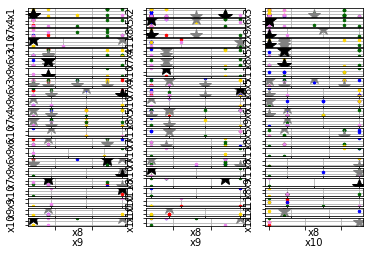

In [96]:
# Print allocated clusters.
#print("Clusters:", clusters)
 
# Display clustering results.
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, samplelist)
visualizer.append_cluster(initial_medoids, samplelist, markersize=12, marker='*', color='gray')
visualizer.append_cluster(medoids, samplelist, markersize=14, marker='*', color='black')
visualizer.show(max_row_size=3)

In [97]:
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FAMOUS_SAMPLES
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.xmeans import xmeans
# load 4D data sample 'Iris'
sample_4d = read_sample(FAMOUS_SAMPLES.SAMPLE_IRIS)
sample_4d
type(sample_4d)

list

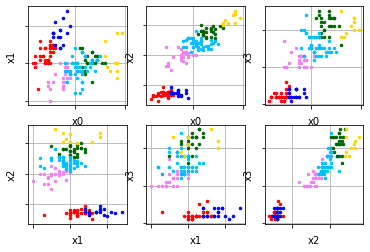

NameError: name 'sample4d' is not defined

In [98]:
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FAMOUS_SAMPLES
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.xmeans import xmeans
# load 4D data sample 'Iris'
sample_4d = read_sample(FAMOUS_SAMPLES.SAMPLE_IRIS)
# initialize 3 initial centers using K-Means++ algorithm
centers = kmeans_plusplus_initializer(sample_4d, 3).initialize()
# performs cluster analysis using X-Means
xmeans_instance = xmeans(sample_4d, centers)
xmeans_instance.process()
clusters = xmeans_instance.get_clusters()
# visualize obtained clusters in multi-dimensional space
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, sample_4d)
visualizer.show(max_row_size=3)

sample4d

In [ ]:
k = 2
# choose medoid 2 and 4 in your C1 and C2 because min(D) in their cluster
initial_medoids = [1,3]
kmedoids_instance = kmedoids(dm, initial_medoids, data_type = 'distance_matrix')
# Run cluster analysis and obtain results.
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
centers = kmedoids_instance.get_medoids()
print(clusters)
# [[1, 0, 2, 5], [3, 4]]
print(centers)
# [1, 3]

In [ ]:
# run PAM from scikit-learn-extra
ske = sklearn_extra.cluster.KMedoids(n_clusters=5, metric="precomputed", method="pam", init="build")
ske.fit(artworkEmotionDistanceMatrix)


In [ ]:
  import sklearn, numpy
  import sklearn_extra.cluster
  
  # Data set 20news
  import sklearn.datasets
  X, y = sklearn.datasets.fetch_20newsgroups_vectorized(return_X_y=True)
  X, y = sklearn.utils.shuffle((X, y), random_state=1)
  
  # Precompute cosine distance matrix
  import sklearn.metrics.pairwise
  diss = sklearn.metrics.pairwise.cosine_distances(X)
  
  # run PAM from scikit-learn-extra
  ske = sklearn_extra.cluster.KMedoids(20, "precomputed", method="pam", init="build")
  ske.fit(diss)
